In [33]:
with open('./medicine_v2.txt') as f:
    medicine = f.readlines()
medicine = [name.split('\n')[0] for name in medicine]
medicine = list(set(medicine))


In [34]:
medicine = [name.split('\n')[0] for name in medicine]

In [35]:
medicine = list(set(medicine))
len(medicine)

179853

In [37]:
medicine[:100]

['',
 '利胆排石片.青岛国风',
 '生鸡内金1克',
 '复方益肝灵胶囊0.27克*36粒',
 '2曲克芦丁片',
 'ECS21A,25A,29A(吻合器)E',
 '明目地黄丸（仲景）甲',
 '盐酸雷尼替丁胶囊(民生）',
 '氟米龙滴眼剂(氟美童）0.10%5毫升*1支',
 '#厄贝沙坦胶囊',
 '[莎尔福]美沙拉嗪栓',
 '缬沙坦胶囊（缬克）[基]80mg*7粒',
 '脑脊液细胞计数/例',
 '复方氨酚烷胺胶囊（河南）',
 '霍姆250毫升*1瓶',
 '杜仲(盐)',
 '米诺环素胶囊',
 '白花蛇舌草颗粒',
 '左氧氟沙星滴眼液(可乐必妥)0.5%/5ml*1瓶',
 '阿托品眼用凝胶',
 'j甲氧氯普胺注射液',
 '药物球囊导管（Braun）',
 '强生缝线(VCP772D)',
 '利凡诺尔针2ml（依沙吖啶针）',
 '氯化钾缓释片（上海海虹）',
 '败酱草15g',
 '(甲)强的松片5mg',
 '*肉豆蔻（颗粒）',
 '格列齐特片(达美康）',
 '奥司他韦胶囊（宜昌）75毫克*1粒',
 'KSS阿奇霉素片',
 '马来酸左旋氨氯地平分散片(玄宁)',
 '☆葡萄糖注射液(单管)10%500ml*1袋',
 '氯化钠注射液0.9%4.5克/500毫升*1袋',
 '环磷腺苷葡胺针(汉达舒)90mg/5ml*1支',
 '栓塞材料（弹簧圈）(进口)',
 '糠酸莫米松鼻喷雾剂（内舒拿）★',
 '噻托溴铵粉吸入剂(思力华）',
 '易善复针[多烯磷脂酰',
 '薄荷(5g/包)',
 '奥硝唑针(普司立)/0.5g*10ml/支',
 '多蒙特）丙氨酰-谷氨酰胺注射液/50ml:10g/瓶',
 '乳酸环丙沙星氯化钠注射液(悉复欢)',
 '盐酸消旋山莨菪碱注射液10毫克*1支',
 '优锐针头粗(昌硕)',
 '使用带吸刮器加收（内分泌系统）/人次',
 '脑动脉腔内血栓取出术/次',
 '氨氯地平片(压氏达)/5mg(14)/片',
 '真空管（分离胶）',
 '速尿/呋塞米',
 '晚餐_榨菜冬瓜',
 '沙棘10gX1.0000',
 '抗蝮蛇毒血清注射液',
 '马栗种子提取物(威利坦)片',
 '一次性压力传感器(TruWave)',
 '精蛋白锌重组人胰岛素混合针／基',
 '球囊(美敦力)

In [38]:
import cv2
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw,ImageFont
%matplotlib inline

origin_images = glob.glob('./blank_region/*.jpg')
font = ImageFont.truetype('./font/Songti.ttc',20,index=6)
save_dir = '../data/train_v2/'

In [39]:
origin_images

['./blank_region/20180908_image_00313.jpg',
 './blank_region/20180908_image_00289.jpg',
 './blank_region/20180908_image_00185.jpg',
 './blank_region/20180908_image_00171.jpg',
 './blank_region/20180908_image_00090.jpg',
 './blank_region/20180908_image_00082.jpg',
 './blank_region/20180908_image_00069.jpg',
 './blank_region/20180908_image_00064 2.jpg']

In [52]:
def gen_text(item,origin_images,fontName='./font/Songti.ttc',fontSize=20):
    len_item = len(item)
    font = ImageFont.truetype(fontName,fontSize,index=6)
    img = cv2.imread(random.choice(origin_images))
    image = img.copy()
    h,w = img.shape[:2]
    text_h,text_w = 32,25*len_item+1
    h_chop = h-text_h
    w_chop = w-text_w
#     print(h,w,text_h,text_w)
    x = np.random.randint(w_chop)
    y = np.random.randint(h_chop)
    image = image[y:y+text_h,x:x+text_w]
#     print(image.shape)
    img_PIL = Image.fromarray(image[:,:,::-1])
    
    draw = ImageDraw.Draw(img_PIL)
    draw.text((10,0),item,font=font,fill=(0,0,0))
    with open(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.txt', "w", encoding='utf-8') as f:
        f.write(item)
    img_PIL.save(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.png') 
    return img_PIL

def genImage(label, fontsize, color=(0, 0, 0),fontName="./font/Songti.ttc"):
    img = Image.new("RGB", ((int)(fontsize * 1.2 * len(label)), (int)(fontsize * 2)), (255, 255, 255))
    font = ImageFont.truetype(fontName, fontsize,index=6)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), label, fill=color, font=font)
    with open("../data/dataline/" + label + "-" + str(fontsize) + ".txt", "w", encoding='utf-8') as f:
        f.write(label)
    img.save("../data/dataline/" + label + "-" + str(fontsize) + ".png")



In [53]:
# alphabet = """'疗绚诚娇溜题贿者廖更纳加奉公一就汴计与路房原妇208-7其>:],，骑刈全消昏傈安久钟嗅不影处驽蜿资关椤地瘸专问忖票嫉炎韵要月田节陂鄙捌备拳伺眼网盎大傍心东愉汇蹿科每业里航晏字平录先13彤鲶产稍督腴有象岳注绍在泺文定核名水过理让偷率等这发”为含肥酉相鄱七编猥锛日镀蒂掰倒辆栾栗综涩州雌滑馀了机块司宰甙兴矽抚保用沧秩如收息滥页疑埠!！姥异橹钇向下跄的椴沫国绥獠报开民蜇何分凇长讥藏掏施羽中讲派嘟人提浼间世而古多倪唇饯控庚首赛蜓味断制觉技替艰溢潮夕钺外摘枋动双单啮户枇确锦曜杜或能效霜盒然侗电晁放步鹃新杖蜂吒濂瞬评总隍对独合也是府青天诲墙组滴级邀帘示已时骸仄泅和遨店雇疫持巍踮境只亨目鉴崤闲体泄杂作般轰化解迂诿蛭璀腾告版服省师小规程线海办引二桧牌砺洄裴修图痫胡许犊事郛基柴呼食研奶律蛋因葆察戏褒戒再李骁工貂油鹅章啄休场给睡纷豆器捎说敏学会浒设诊格廓查来霓室溆￠诡寥焕舜柒狐回戟砾厄实翩尿五入径惭喹股宇篝|;美期云九祺扮靠锝槌系企酰阊暂蚕忻豁本羹执条钦H獒限进季楦于芘玖铋茯未答粘括样精欠矢甥帷嵩扣令仔风皈行支部蓉刮站蜡救钊汗松嫌成可.鹤院从交政怕活调球局验髌第韫谗串到圆年米/*友忿检区看自敢刃个兹弄流留同没齿星聆轼湖什三建蛔儿椋汕震颧鲤跟力情璺铨陪务指族训滦鄣濮扒商箱十召慷辗所莞管护臭横硒嗓接侦六露党馋驾剖高侬妪幂猗绺骐央酐孝筝课徇缰门男西项句谙瞒秃篇教碲罚声呐景前富嘴鳌稀免朋啬睐去赈鱼住肩愕速旁波厅健茼厥鲟谅投攸炔数方击呋谈绩别愫僚躬鹧胪炳招喇膨泵蹦毛结54谱识陕粽婚拟构且搜任潘比郢妨醪陀桔碘扎选哈骷楷亿明缆脯监睫逻婵共赴淝凡惦及达揖谩澹减焰蛹番祁柏员禄怡峤龙白叽生闯起细装谕竟聚钙上导渊按艾辘挡耒盹饪臀记邮蕙受各医搂普滇朗茸带翻酚(光堤墟蔷万幻〓瑙辈昧盏亘蛀吉铰请子假闻税井诩哨嫂好面琐校馊鬣缂营访炖占农缀否经钚棵趟张亟吏茶谨捻论迸堂玉信吧瞠乡姬寺咬溏苄皿意赉宝尔钰艺特唳踉都荣倚登荐丧奇涵批炭近符傩感道着菊虹仲众懈濯颞眺南释北缝标既茗整撼迤贲挎耱拒某妍卫哇英矶藩治他元领膜遮穗蛾飞荒棺劫么市火温拈棚洼转果奕卸迪伸泳斗邡侄涨屯萋胭氡崮枞惧冒彩斜手豚随旭淑妞形菌吲沱争驯歹挟兆柱传至包内响临红功弩衡寂禁老棍耆渍织害氵渑布载靥嗬虽苹咨娄库雉榜帜嘲套瑚亲簸欧边6腿旮抛吹瞳得镓梗厨继漾愣憨士策窑抑躯襟脏参贸言干绸鳄穷藜音折详)举悍甸癌黎谴死罩迁寒驷袖媒蒋掘模纠恣观祖蛆碍位稿主澧跌筏京锏帝贴证糠才黄鲸略炯饱四出园犀牧容汉杆浈汰瑷造虫瘩怪驴济应花沣谔夙旅价矿以考su呦晒巡茅准肟瓴詹仟褂译桌混宁怦郑抿些余鄂饴攒珑群阖岔琨藓预环洮岌宀杲瀵最常囡周踊女鼓袭喉简范薯遐疏粱黜禧法箔斤遥汝奥直贞撑置绱集她馅逗钧橱魉[恙躁唤9旺膘待脾惫购吗依盲度瘿蠖俾之镗拇鲵厝簧续款展啃表剔品钻腭损清锶统涌寸滨贪链吠冈伎迥咏吁览防迅失汾阔逵绀蔑列川凭努熨揪利俱绉抢鸨我即责膦易毓鹊刹玷岿空嘞绊排术估锷违们苟铜播肘件烫审鲂广像铌惰铟巳胍鲍康憧色恢想拷尤疳知SYFDA峄裕帮握搔氐氘难墒沮雨叁缥悴藐湫娟苑稠颛簇后阕闭蕤缚怎佞码嘤蔡痊舱螯帕赫昵升烬岫、疵蜻髁蕨隶烛械丑盂梁强鲛由拘揉劭龟撤钩呕孛费妻漂求阑崖秤甘通深补赃坎床啪承吼量暇钼烨阂擎脱逮称P神属矗华届狍葑汹育患窒蛰佼静槎运鳗庆逝曼疱克代官此麸耧蚌晟例础榛副测唰缢迹灬霁身岁赭扛又菡乜雾板读陷徉贯郁虑变钓菜圾现琢式乐维渔浜左吾脑钡警T啵拴偌漱湿硕止骼魄积燥联踢玛|则窿见振畿送班钽您赵刨印讨踝籍谡舌崧汽蔽沪酥绒怖财帖肱私莎勋羔霸励哼帐将帅渠纪婴娩岭厘滕吻伤坝冠戊隆瘁介涧物黍并姗奢蹑掣垸锴命箍捉病辖琰眭迩艘绌繁寅若毋思诉类诈燮轲酮狂重反职筱县委磕绣奖晋濉志徽肠呈獐坻口片碰几村柿劳料获亩惕晕厌号罢池正鏖煨家棕复尝懋蜥锅岛扰队坠瘾钬@卧疣镇譬冰彷频黯据垄采八缪瘫型熹砰楠襁箐但嘶绳啤拍盥穆傲洗盯塘怔筛丿台恒喂葛永￥烟酒桦书砂蚝缉态瀚袄圳轻蛛超榧遛姒奘铮右荽望偻卡丶氰附做革索戚坨桷唁垅榻岐偎坛莨山殊微骇陈爨推嗝驹澡藁呤卤嘻糅逛侵郓酌德摇※鬃被慨殡羸昌泡戛鞋河宪沿玲鲨翅哽源铅语照邯址荃佬顺鸳町霭睾瓢夸椁晓酿痈咔侏券噎湍签嚷离午尚社锤背孟使浪缦潍鞅军姹驶笑鳟鲁》孽钜绿洱礴焯椰颖囔乌孔巴互性椽哞聘昨早暮胶炀隧低彗昝铁呓氽藉喔癖瑗姨权胱韦堑蜜酋楝砝毁靓歙锲究屋喳骨辨碑武鸠宫辜烊适坡殃培佩供走蜈迟翼况姣凛浔吃飘债犟金促苛崇坂莳畔绂兵蠕斋根砍亢欢恬崔剁餐榫快扶‖濒缠鳜当彭驭浦篮昀锆秸钳弋娣瞑夷龛苫拱致%嵊障隐弑初娓抉汩累蓖"唬助苓昙押毙破城郧逢嚏獭瞻溱婿赊跨恼璧萃姻貉灵炉密氛陶砸谬衔点琛沛枳层岱诺脍榈埂征冷裁打蹴素瘘逞蛐聊激腱萘踵飒蓟吆取咙簋涓矩曝挺揣座你史舵焱尘苏笈脚溉榨诵樊邓焊义庶儋蟋蒲赦呷杞诠豪还试颓茉太除紫逃痴草充鳕珉祗墨渭烩蘸慕璇镶穴嵘恶骂险绋幕碉肺戳刘潞秣纾潜銮洛须罘销瘪汞兮屉r林厕质探划狸殚善煊烹〒锈逯宸辍泱柚袍远蹋嶙绝峥娥缍雀徵认镱谷=贩勉撩鄯斐洋非祚泾诒饿撬威晷搭芍锥笺蓦候琊档礁沼卵荠忑朝凹瑞头仪弧孵畏铆突衲车浩气茂悖厢枕酝戴湾邹飚攘锂写宵翁岷无喜丈挑嗟绛殉议槽具醇淞笃郴阅饼底壕砚弈询缕庹翟零筷暨舟闺甯撞麂茌蔼很珲捕棠角阉媛娲诽剿尉爵睬韩诰匣危糍镯立浏阳少盆舔擘匪申尬铣旯抖赘瓯居ˇ哮游锭茏歌坏甚秒舞沙仗劲潺阿燧郭嗖霏忠材奂耐跺砀输岖媳氟极摆灿今扔腻枝奎药熄吨话q额慑嘌协喀壳埭视著於愧陲翌峁颅佛腹聋侯咎叟秀颇存较罪哄岗扫栏钾羌己璨枭霉煌涸衿键镝益岢奏连夯睿冥均糖狞蹊稻爸刿胥煜丽肿璃掸跚灾垂樾濑乎莲窄犹撮战馄软络显鸢胸宾妲恕埔蝌份遇巧瞟粒恰剥桡博讯凯堇阶滤卖斌骚彬兑磺樱舷两娱福仃差找桁÷净把阴污戬雷碓蕲楚罡焖抽妫咒仑闱尽邑菁爱贷沥鞑牡嗉崴骤塌嗦订拮滓捡锻次坪杩臃箬融珂鹗宗枚降鸬妯阄堰盐毅必杨崃俺甬状莘货耸菱腼铸唏痤孚澳懒溅翘疙杷淼缙骰喊悉砻坷艇赁界谤纣宴晃茹归饭梢铡街抄肼鬟苯颂撷戈炒咆茭瘙负仰客琉铢封卑珥椿镧窨鬲寿御袤铃萎砖餮脒裳肪孕嫣馗嵇恳氯江石褶冢祸阻狈羞银靳透咳叼敷芷啥它瓤兰痘懊逑肌往捺坊甩呻〃沦忘膻祟菅剧崆智坯臧霍墅攻眯倘拢骠铐庭岙瓠′缺泥迢捶?？郏喙掷沌纯秘种听绘固螨团香盗妒埚蓝拖旱荞铀血遏汲辰叩拽幅硬惶桀漠措泼唑齐肾念酱虚屁耶旗砦闵婉馆拭绅韧忏窝醋葺顾辞倜堆辋逆玟贱疾董惘倌锕淘嘀莽俭笏绑鲷杈择蟀粥嗯驰逾案谪褓胫哩昕颚鲢绠躺鹄崂儒俨丝尕泌啊萸彰幺吟骄苣弦脊瑰〈诛镁析闪剪侧哟框螃守嬗燕狭铈缮概迳痧鲲俯售笼痣扉挖满咋援邱扇歪便玑绦峡蛇叨〖泽胃斓喋怂坟猪该蚬炕弥赞棣晔娠挲狡创疖铕镭稷挫弭啾翔粉履苘哦楼秕铂土锣瘟挣栉习享桢袅磨桂谦延坚蔚噗署谟猬钎恐嬉雒倦衅亏璩睹刻殿王算雕麻丘柯骆丸塍谚添鲈垓桎蚯芥予飕镦谌窗醚菀亮搪莺蒿羁足J真轶悬衷靛翊掩哒炅掐冼妮l谐稚荆擒犯陵虏浓崽刍陌傻孜千靖演矜钕煽杰酗渗伞栋俗泫戍罕沾疽灏煦芬磴叱阱榉湃蜀叉醒彪租郡篷屎良垢隗弱陨峪砷掴颁胎雯绵贬沐撵隘篙暖曹陡栓填臼彦瓶琪潼哪鸡摩啦俟锋域耻蔫疯纹撇毒绶痛酯忍爪赳歆嘹辕烈册朴钱吮毯癜娃谀邵厮炽璞邃丐追词瓒忆轧芫谯喷弟半冕裙掖墉绮寝苔势顷褥切衮君佳嫒蚩霞佚洙逊镖暹唛&殒顶碗獗轭铺蛊废恹汨崩珍那杵曲纺夏薰傀闳淬姘舀拧卷楂恍讪厩寮篪赓乘灭盅鞣沟慎挂饺鼾杳树缨丛絮娌臻嗳篡侩述衰矛圈蚜匕筹匿濞晨叶骋郝挚蚴滞增侍描瓣吖嫦蟒匾圣赌毡癞恺百曳需篓肮庖帏卿驿遗蹬鬓骡歉芎胳屐禽烦晌寄媾狄翡苒船廉终痞殇々畦饶改拆悻萄￡瓿乃訾桅匮溧拥纱铍骗蕃龋缬父佐疚栎醍掳蓄x惆颜鲆榆〔猎敌暴谥鲫贾罗玻缄扦芪癣落徒臾恿猩托邴肄牵春陛耀刊拓蓓邳堕寇枉淌啡湄兽酷萼碚濠萤夹旬戮梭琥椭昔勺蜊绐晚孺僵宣摄冽旨萌忙蚤眉噼蟑付契瓜悼颡壁曾窕颢澎仿俑浑嵌浣乍碌褪乱蔟隙玩剐葫箫纲围伐决伙漩瑟刑肓镳缓蹭氨皓典畲坍铑檐塑洞倬储胴淳戾吐灼惺妙毕珐缈虱盖羰鸿磅谓髅娴苴唷蚣霹抨贤唠犬誓逍庠逼麓籼釉呜碧秧氩摔霄穸纨辟妈映完牛缴嗷炊恩荔茆掉紊慌莓羟阙萁磐另蕹辱鳐湮吡吩唐睦垠舒圜冗瞿溺芾囱匠僳汐菩饬漓黑霰浸濡窥毂蒡兢驻鹉芮诙迫雳厂忐臆猴鸣蚪栈箕羡渐莆捍眈哓趴蹼埕嚣骛宏淄斑噜严瑛垃椎诱压庾绞焘廿抡迄棘夫纬锹眨瞌侠脐竞瀑孳骧遁姜颦荪滚萦伪逸粳爬锁矣役趣洒颔诏逐奸甭惠攀蹄泛尼拼阮鹰亚颈惑勒〉际肛爷刚钨丰养冶鲽辉蔻画覆皴妊麦返醉皂擀〗酶凑粹悟诀硖港卜z杀涕±舍铠抵弛段敝镐奠拂轴跛袱et沉菇俎薪峦秭蟹历盟菠寡液肢喻染裱悱抱氙赤捅猛跑氮谣仁尺辊窍烙衍架擦倏璐瑁币楞胖夔趸邛惴饕虔蝎§哉贝宽辫炮扩饲籽魏菟锰伍猝末琳哚蛎邂呀姿鄞却歧仙恸椐森牒寤袒婆虢雅钉朵贼欲苞寰故龚坭嘘咫礼硷兀睢汶’铲烧绕诃浃钿哺柜讼颊璁腔洽咐脲簌筠镣玮鞠谁兼姆挥梯蝴谘漕刷躏宦弼b垌劈麟莉揭笙渎仕嗤仓配怏抬错泯镊孰猿邪仍秋鼬壹歇吵炼<尧射柬廷胧霾凳隋肚浮梦祥株堵退L鹫跎凶毽荟炫栩玳甜沂鹿顽伯爹赔蛴徐匡欣狰缸雹蟆疤默沤啜痂衣禅wih辽葳黝钗停沽棒馨颌肉吴硫悯劾娈马啧吊悌镑峭帆瀣涉咸疸滋泣翦拙癸钥蜒+尾庄凝泉婢渴谊乞陆锉糊鸦淮IBN晦弗乔庥葡尻席橡傣渣拿惩麋斛缃矮蛏岘鸽姐膏催奔镒喱蠡摧钯胤柠拐璋鸥卢荡倾^_珀逄萧塾掇贮笆聂圃冲嵬M滔笕值炙偶蜱搐梆汪蔬腑鸯蹇敞绯仨祯谆梧糗鑫啸豺囹猾巢柄瀛筑踌沭暗苁鱿蹉脂蘖牢热木吸溃宠序泞偿拜檩厚朐毗螳吞媚朽担蝗橘畴祈糟盱隼郜惜珠裨铵焙琚唯咚噪骊丫滢勤棉呸咣淀隔蕾窈饨挨煅短匙粕镜赣撕墩酬馁豌颐抗酣氓佑搁哭递耷涡桃贻碣截瘦昭镌蔓氚甲猕蕴蓬散拾纛狼猷铎埋旖矾讳囊糜迈粟蚂紧鲳瘢栽稼羊锄斟睁桥瓮蹙祉醺鼻昱剃跳篱跷蒜翎宅晖嗑壑峻癫屏狠陋袜途憎祀莹滟佶溥臣约盛峰磁慵婪拦莅朕鹦粲裤哎疡嫖琵窟堪谛嘉儡鳝斩郾驸酊妄胜贺徙傅噌钢栅庇恋匝巯邈尸锚粗佟蛟薹纵蚊郅绢锐苗俞篆淆膀鲜煎诶秽寻涮刺怀噶巨褰魅灶灌桉藕谜舸薄搀恽借牯痉渥愿亓耘杠柩锔蚶钣珈喘蹒幽赐稗晤莱泔扯肯菪裆腩豉疆骜腐倭珏唔粮亡润慰伽橄玄誉醐胆龊粼塬陇彼削嗣绾芽妗垭瘴爽薏寨龈泠弹赢漪猫嘧涂恤圭茧烽屑痕巾赖荸凰腮畈亵蹲偃苇澜艮换骺烘苕梓颉肇哗悄氤涠葬屠鹭植竺佯诣鲇瘀鲅邦移滁冯耕癔戌茬沁巩悠湘洪痹锟循谋腕鳃钠捞焉迎碱伫急榷奈邝卯辄皲卟醛畹忧稳雄昼缩阈睑扌耗曦涅捏瞧邕淖漉铝耦禹湛喽莼琅诸苎纂硅始嗨傥燃臂赅嘈呆贵屹壮肋亍蚀卅豹腆邬迭浊}童螂捐圩勐触寞汊壤荫膺渌芳懿遴螈泰蓼蛤茜舅枫朔膝眙避梅判鹜璜牍缅垫藻黔侥惚懂踩腰腈札丞唾慈顿摹荻琬~斧沈滂胁胀幄莜Z匀鄄掌绰茎焚赋萱谑汁铒瞎夺蜗野娆冀弯篁懵灞隽芡脘俐辩芯掺喏膈蝈觐悚踹蔗熠鼠呵抓橼峨畜缔禾崭弃熊摒凸拗穹蒙抒祛劝闫扳阵醌踪喵侣搬仅荧赎蝾琦买婧瞄寓皎冻赝箩莫瞰郊笫姝筒枪遣煸袋舆痱涛母〇启践耙绲盘遂昊搞槿诬纰泓惨檬亻越Co憩熵祷钒暧塔阗胰咄娶魔琶钞邻扬杉殴咽弓〆髻】吭揽霆拄殖脆彻岩芝勃辣剌钝嘎甄佘皖伦授徕憔挪皇庞稔芜踏溴兖卒擢饥鳞煲‰账颗叻斯捧鳍琮讹蛙纽谭酸兔莒睇伟觑羲嗜宜褐旎辛卦诘筋鎏溪挛熔阜晰鳅丢奚灸呱献陉黛鸪甾萨疮拯洲疹辑叙恻谒允柔烂氏逅漆拎惋扈湟纭啕掬擞哥忽涤鸵靡郗瓷扁廊怨雏钮敦E懦憋汀拚啉腌岸f痼瞅尊咀眩飙忌仝迦熬毫胯篑茄腺凄舛碴锵诧羯後漏汤宓仞蚁壶谰皑铄棰罔辅晶苦牟闽\烃饮聿丙蛳朱煤涔鳖犁罐荼砒淦妤黏戎孑婕瑾戢钵枣捋砥衩狙桠稣阎肃梏诫孪昶婊衫嗔侃塞蜃樵峒貌屿欺缫阐栖诟珞荭吝萍嗽恂啻蜴磬峋俸豫谎徊镍韬魇晴U囟猜蛮坐囿伴亭肝佗蝠妃胞滩榴氖垩苋砣扪馏姓轩厉夥侈禀垒岑赏钛辐痔披纸碳“坞蠓挤荥沅悔铧帼蒌蝇apyng哀浆瑶凿桶馈皮奴苜佤伶晗铱炬优弊氢恃甫攥端锌灰稹炝曙邋亥眶碾拉萝绔捷浍腋姑菖凌涞麽锢桨潢绎镰殆锑渝铬困绽觎匈糙暑裹鸟盔肽迷綦『亳佝俘钴觇骥仆疝跪婶郯瀹唉脖踞针晾忒扼瞩叛椒疟嗡邗肆跆玫忡捣咧唆艄蘑潦笛阚沸泻掊菽贫斥髂孢镂赂麝鸾屡衬苷恪叠希粤爻喝茫惬郸绻庸撅碟宄妹膛叮饵崛嗲椅冤搅咕敛尹垦闷蝉霎勰败蓑泸肤鹌幌焦浠鞍刁舰乙竿裔。茵函伊兄丨娜匍謇莪宥似蝽翳酪翠粑薇祢骏赠叫Q噤噻竖芗莠潭俊羿耜O郫趁嗪囚蹶芒洁笋鹑敲硝啶堡渲揩』携宿遒颍扭棱割萜蔸葵琴捂饰衙耿掠募岂窖涟蔺瘤柞瞪怜匹距楔炜哆秦缎幼茁绪痨恨楸娅瓦桩雪嬴伏榔妥铿拌眠雍缇‘卓搓哌觞噩屈哧髓咦巅娑侑淫膳祝勾姊莴胄疃薛蜷胛巷芙芋熙闰勿窃狱剩钏幢陟铛慧靴耍k浙浇飨惟绗祜澈啼咪磷摞诅郦抹跃壬吕肖琏颤尴剡抠凋赚泊津宕殷倔氲漫邺涎怠$垮荬遵俏叹噢饽蜘孙筵疼鞭羧牦箭潴c眸祭髯啖坳愁芩驮倡巽穰沃胚怒凤槛剂趵嫁v邢灯鄢桐睽檗锯槟婷嵋圻诗蕈颠遭痢芸怯馥竭锗徜恭遍籁剑嘱苡龄僧桑潸弘澶楹悲讫愤腥悸谍椹呢桓葭攫阀翰躲敖柑郎笨橇呃魁燎脓葩磋垛玺狮沓砜蕊锺罹蕉翱虐闾巫旦茱嬷枯鹏贡芹汛矫绁拣禺佃讣舫惯乳趋疲挽岚虾衾蠹蹂飓氦铖孩稞瑜壅掀勘妓畅髋W庐牲蓿榕练垣唱邸菲昆婺穿绡麒蚱掂愚泷涪漳妩娉榄讷觅旧藤煮呛柳腓叭庵烷阡罂蜕擂猖咿媲脉【沏貅黠熏哲烁坦酵兜×潇撒剽珩圹乾摸樟帽嗒襄魂轿憬锡〕喃皆咖隅脸残泮袂鹂珊囤捆咤误徨闹淙芊淋怆囗拨梳渤RG绨蚓婀幡狩麾谢唢裸旌伉纶裂驳砼咛澄樨蹈宙澍倍貔操勇蟠摈砧虬够缁悦藿撸艹摁淹豇虎榭ˉ吱d°喧荀踱侮奋偕饷犍惮坑璎徘宛妆袈倩窦昂荏乖K怅撰鳙牙袁酞X痿琼闸雁趾荚虻涝《杏韭偈烤绫鞘卉症遢蓥诋杭荨匆竣簪辙敕虞丹缭咩黟m淤瑕咂铉硼茨嶂痒畸敬涿粪窘熟叔嫔盾忱裘憾梵赡珙咯娘庙溯胺葱痪摊荷卞乒髦寐铭坩胗枷爆溟嚼羚砬轨惊挠罄竽菏氧浅楣盼枢炸阆杯谏噬淇渺俪秆墓泪跻砌痰垡渡耽釜讶鳎煞呗韶舶绷鹳缜旷铊皱龌檀霖奄槐艳蝶旋哝赶骞蚧腊盈丁`蜚矸蝙睨嚓僻鬼醴夜彝磊笔拔栀糕厦邰纫逭纤眦膊馍躇烯蘼冬诤暄骶哑瘠」臊丕愈咱螺擅跋搏硪谄笠淡嘿骅谧鼎皋姚歼蠢驼耳胬挝涯狗蒽孓犷凉芦箴铤孤嘛坤V茴朦挞尖橙诞搴碇洵浚帚蜍漯柘嚎讽芭荤咻祠秉跖埃吓糯眷馒惹娼鲑嫩讴轮瞥靶褚乏缤宋帧删驱碎扑俩俄偏涣竹噱皙佰渚唧斡#镉刀崎筐佣夭贰肴峙哔艿匐牺镛缘仡嫡劣枸堀梨簿鸭蒸亦稽浴{衢束槲j阁揍疥棋潋聪窜乓睛插冉阪苍搽「蟾螟幸仇樽撂慢跤幔俚淅覃觊溶妖帛侨曰妾泗 △▲◎●α"""
# charact = alphabet[:]
# textLen = len(charact) - 11
for item in medicine:
    gen_text(item,origin_images,fontSize=20)
#     gen_text(item,origin_images,fontSize=25)


In [13]:
img = gen_text('深静脉导管',origin_images,fontSize=20)

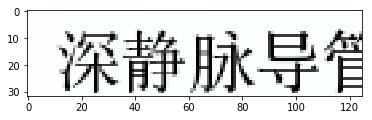

In [14]:
plt.imshow(img)

In [ ]:
medicine

In [ ]:
import sys